
## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_score, recall_score

### Import Dataset

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# Look at preview of data
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Check Characteristics of Data

In [4]:
print(f'Data shape = {data.shape}')

Data shape = (5000, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
print('Check dataset for null values:')
data.isnull().sum()

Check dataset for null values:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# Statistical summary of data
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Imputation

In [8]:
# 'Experience' column has some negative values which does not make sense. Replace these with median
data['Experience'] = np.where(data['Experience'] < 0, data['Experience'].median(), data['Experience'])

**Insights**
1. We have no null values in our dataset, however the 'Experience' column has some negative values. This was probably the result of a data entry error, but to be safe I have replaced them with the median value
2. We have a mixture of quantitative and qualitative features. Categorical variables will have to be processed (dummies, encoding etc)
3. Whilst 'Family' is a numerical column, we will treat it as categorical because it only has 4 unique values
4. ZIP Code appears to have many unique values. We will need to decide whether to create dummies for every code (results in many columns) or find another way to process it

## 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

### Check Unique Values in Each Column

In [9]:
for col in data.columns:
    print(f'Unique Values in {col} column: {data[col].nunique()}')

Unique Values in ID column: 5000
Unique Values in Age column: 45
Unique Values in Experience column: 44
Unique Values in Income column: 162
Unique Values in ZIP Code column: 467
Unique Values in Family column: 4
Unique Values in CCAvg column: 108
Unique Values in Education column: 3
Unique Values in Mortgage column: 347
Unique Values in Personal Loan column: 2
Unique Values in Securities Account column: 2
Unique Values in CD Account column: 2
Unique Values in Online column: 2
Unique Values in CreditCard column: 2


### Number of People With Zero Mortgage

In [10]:
print(f'Number of customers with zero mortgage = {len(data[data.Mortgage == 0])}')

Number of customers with zero mortgage = 3462


### Number of People With Zero Credit Card Spending Per Month

In [11]:
print(f'Number of customers with zero avg spend on credit card = {len(data[data.CCAvg == 0])}')
print(f'Among customers WHO HAVE a credict card, the number with zero avg spend = {len(data[(data.CreditCard == 1) & (data.CCAvg == 0)])}')

Number of customers with zero avg spend on credit card = 106
Among customers WHO HAVE a credict card, the number with zero avg spend = 28


### Value Counts of All Categorical Columns

In [12]:
# Define categorial columns
categorical = [
    'ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'
]

# Loop through each column and calculate the unique values and counts
for col in categorical:
    print(f'Value Counts for {col} column:')
    print(data[col].value_counts())
    print('-----------------------------------------------------')

Value Counts for ZIP Code column:
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64
-----------------------------------------------------
Value Counts for Education column:
1    2096
3    1501
2    1403
Name: Education, dtype: int64
-----------------------------------------------------
Value Counts for Personal Loan column:
0    4520
1     480
Name: Personal Loan, dtype: int64
-----------------------------------------------------
Value Counts for Securities Account column:
0    4478
1     522
Name: Securities Account, dtype: int64
-----------------------------------------------------
Value Counts for CD Account column:
0    4698
1     302
Name: CD Account, dtype: int64
-----------------------------------------------------
Value Counts for Online column:
1    2984
0    2016
Name: Online, dtype: int64
-----------------------------------------------------


### Univariate Analysis

Univariate Plot for Age:


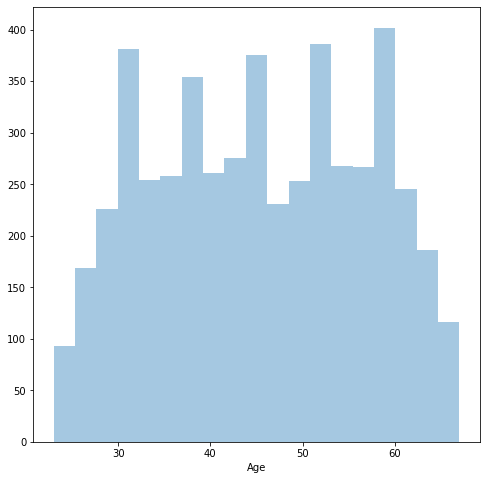

----------------------------------------------------------------------------------
Univariate Plot for Experience:


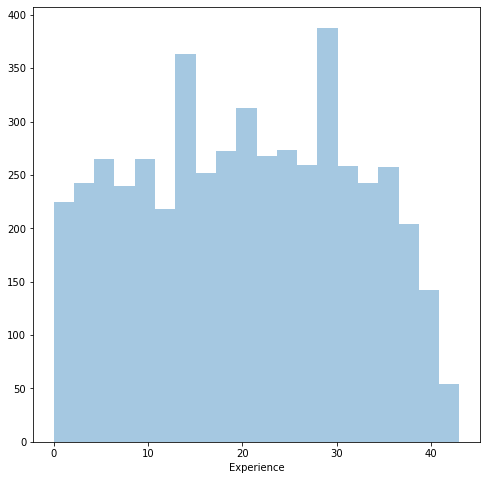

----------------------------------------------------------------------------------
Univariate Plot for Income:


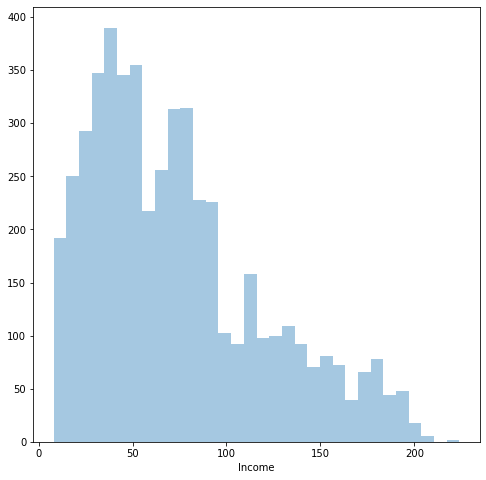

----------------------------------------------------------------------------------
Univariate Plot for ZIP Code:


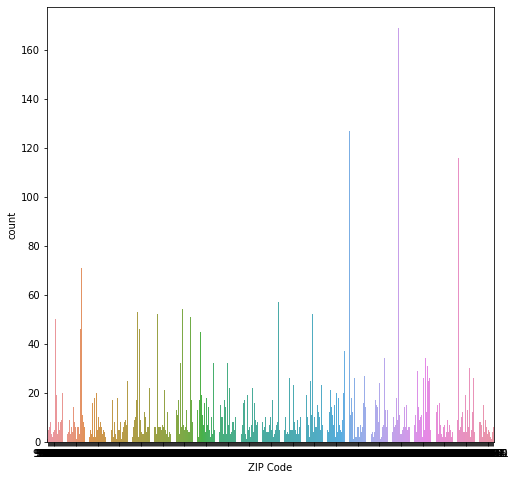

----------------------------------------------------------------------------------
Univariate Plot for Family:


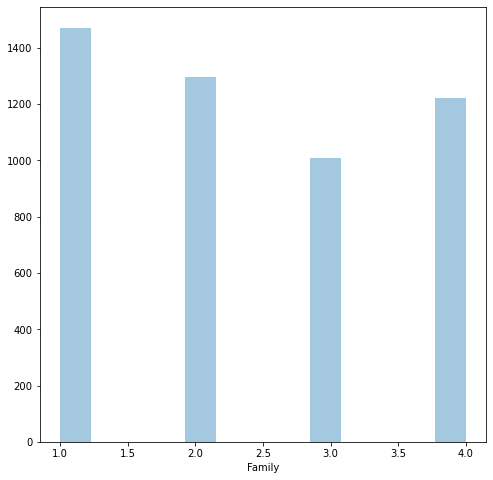

----------------------------------------------------------------------------------
Univariate Plot for CCAvg:


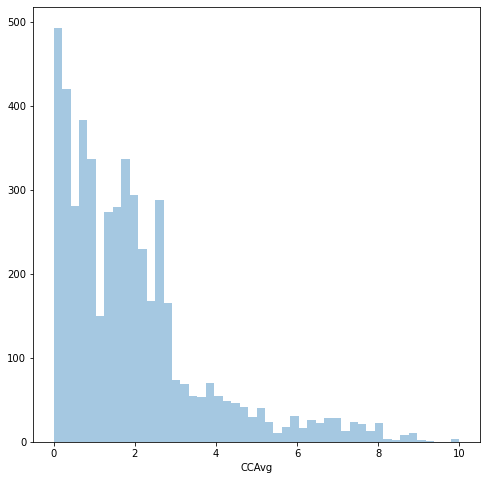

----------------------------------------------------------------------------------
Univariate Plot for Education:


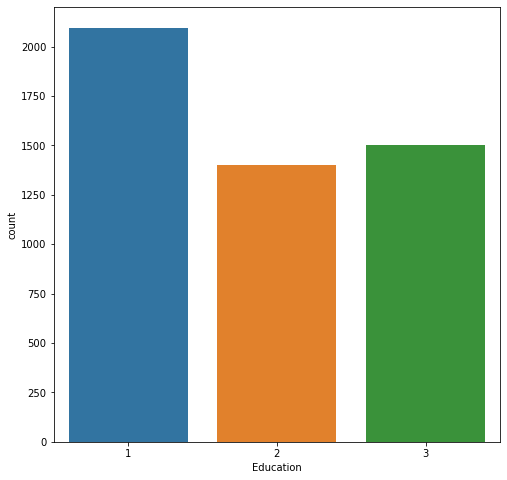

----------------------------------------------------------------------------------
Univariate Plot for Mortgage:


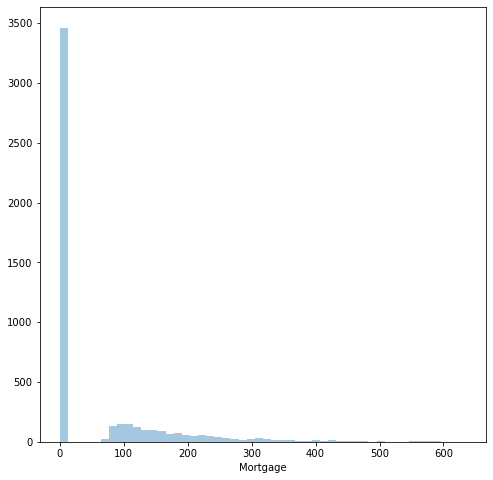

----------------------------------------------------------------------------------
Univariate Plot for Personal Loan:


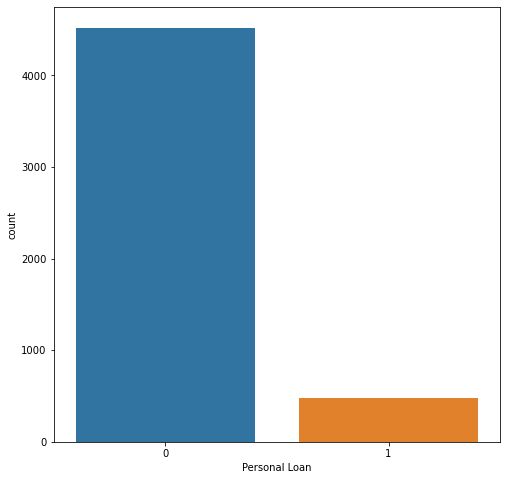

----------------------------------------------------------------------------------
Univariate Plot for Securities Account:


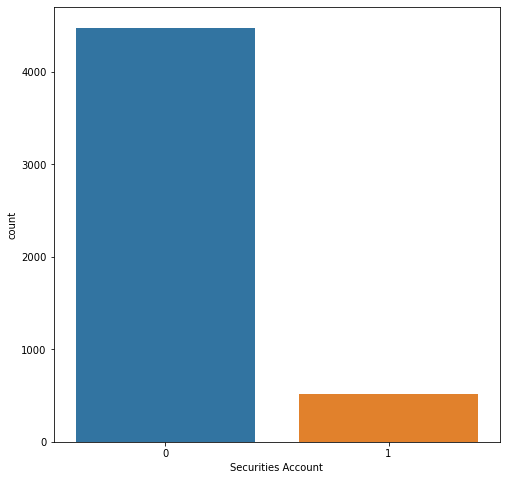

----------------------------------------------------------------------------------
Univariate Plot for CD Account:


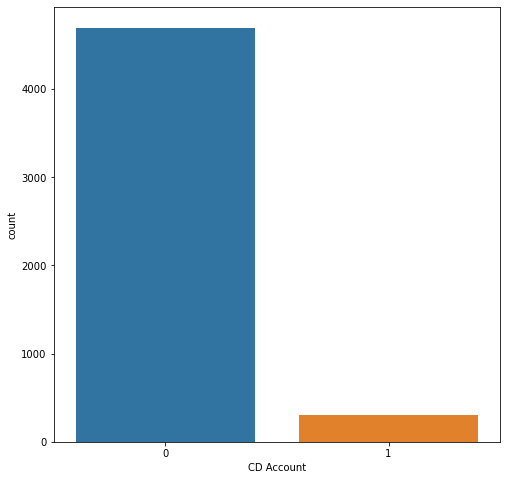

----------------------------------------------------------------------------------
Univariate Plot for Online:


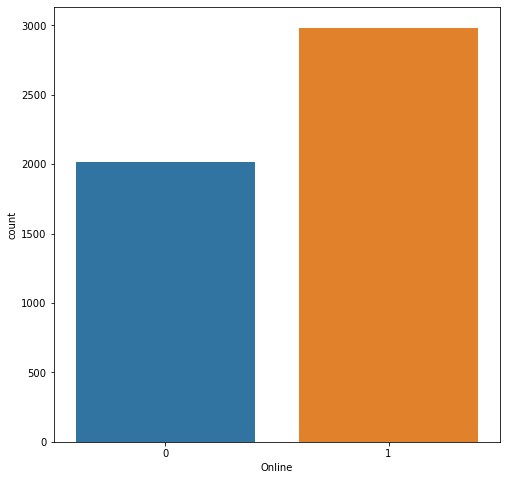

----------------------------------------------------------------------------------
Univariate Plot for CreditCard:


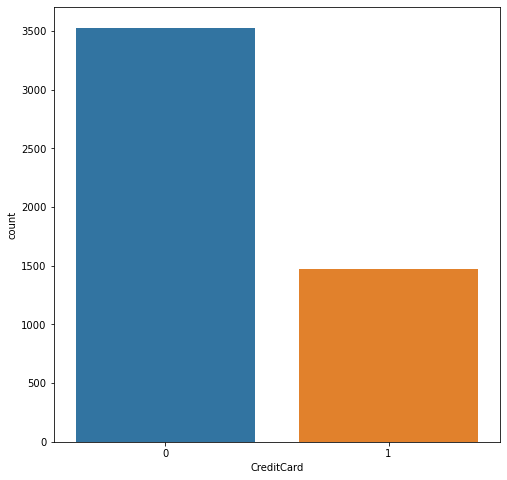

----------------------------------------------------------------------------------


In [13]:
for col in data.columns[1:]: # Skip ID column
    print(f'Univariate Plot for {col}:')
    plt.figure(figsize=(8,8))
    
    if col in categorical: # Do countplot for categorical features
        sns.countplot(data[col])
    
    else:
        sns.distplot(data[col], kde=False) # And distplot for numerical features
    plt.show()
    print('----------------------------------------------------------------------------------')

**Insights**
* Age appears to be normally distributed
* Income and CCAvg are positively skewed
* Family only has 4 unique values. For this reason, we shall treat it as a categorical varible and dummy encode the unique values
* Mortgage has an interesting distribution - a large majority have a value of zero, whilst the remainder have positive values roughly around 100k - 300k USD
* Our target variable Personal Loan is very imbalanced. This could result in some issues later when we come to the modelling stage

### Bivariate Analysis - Build Pairplot

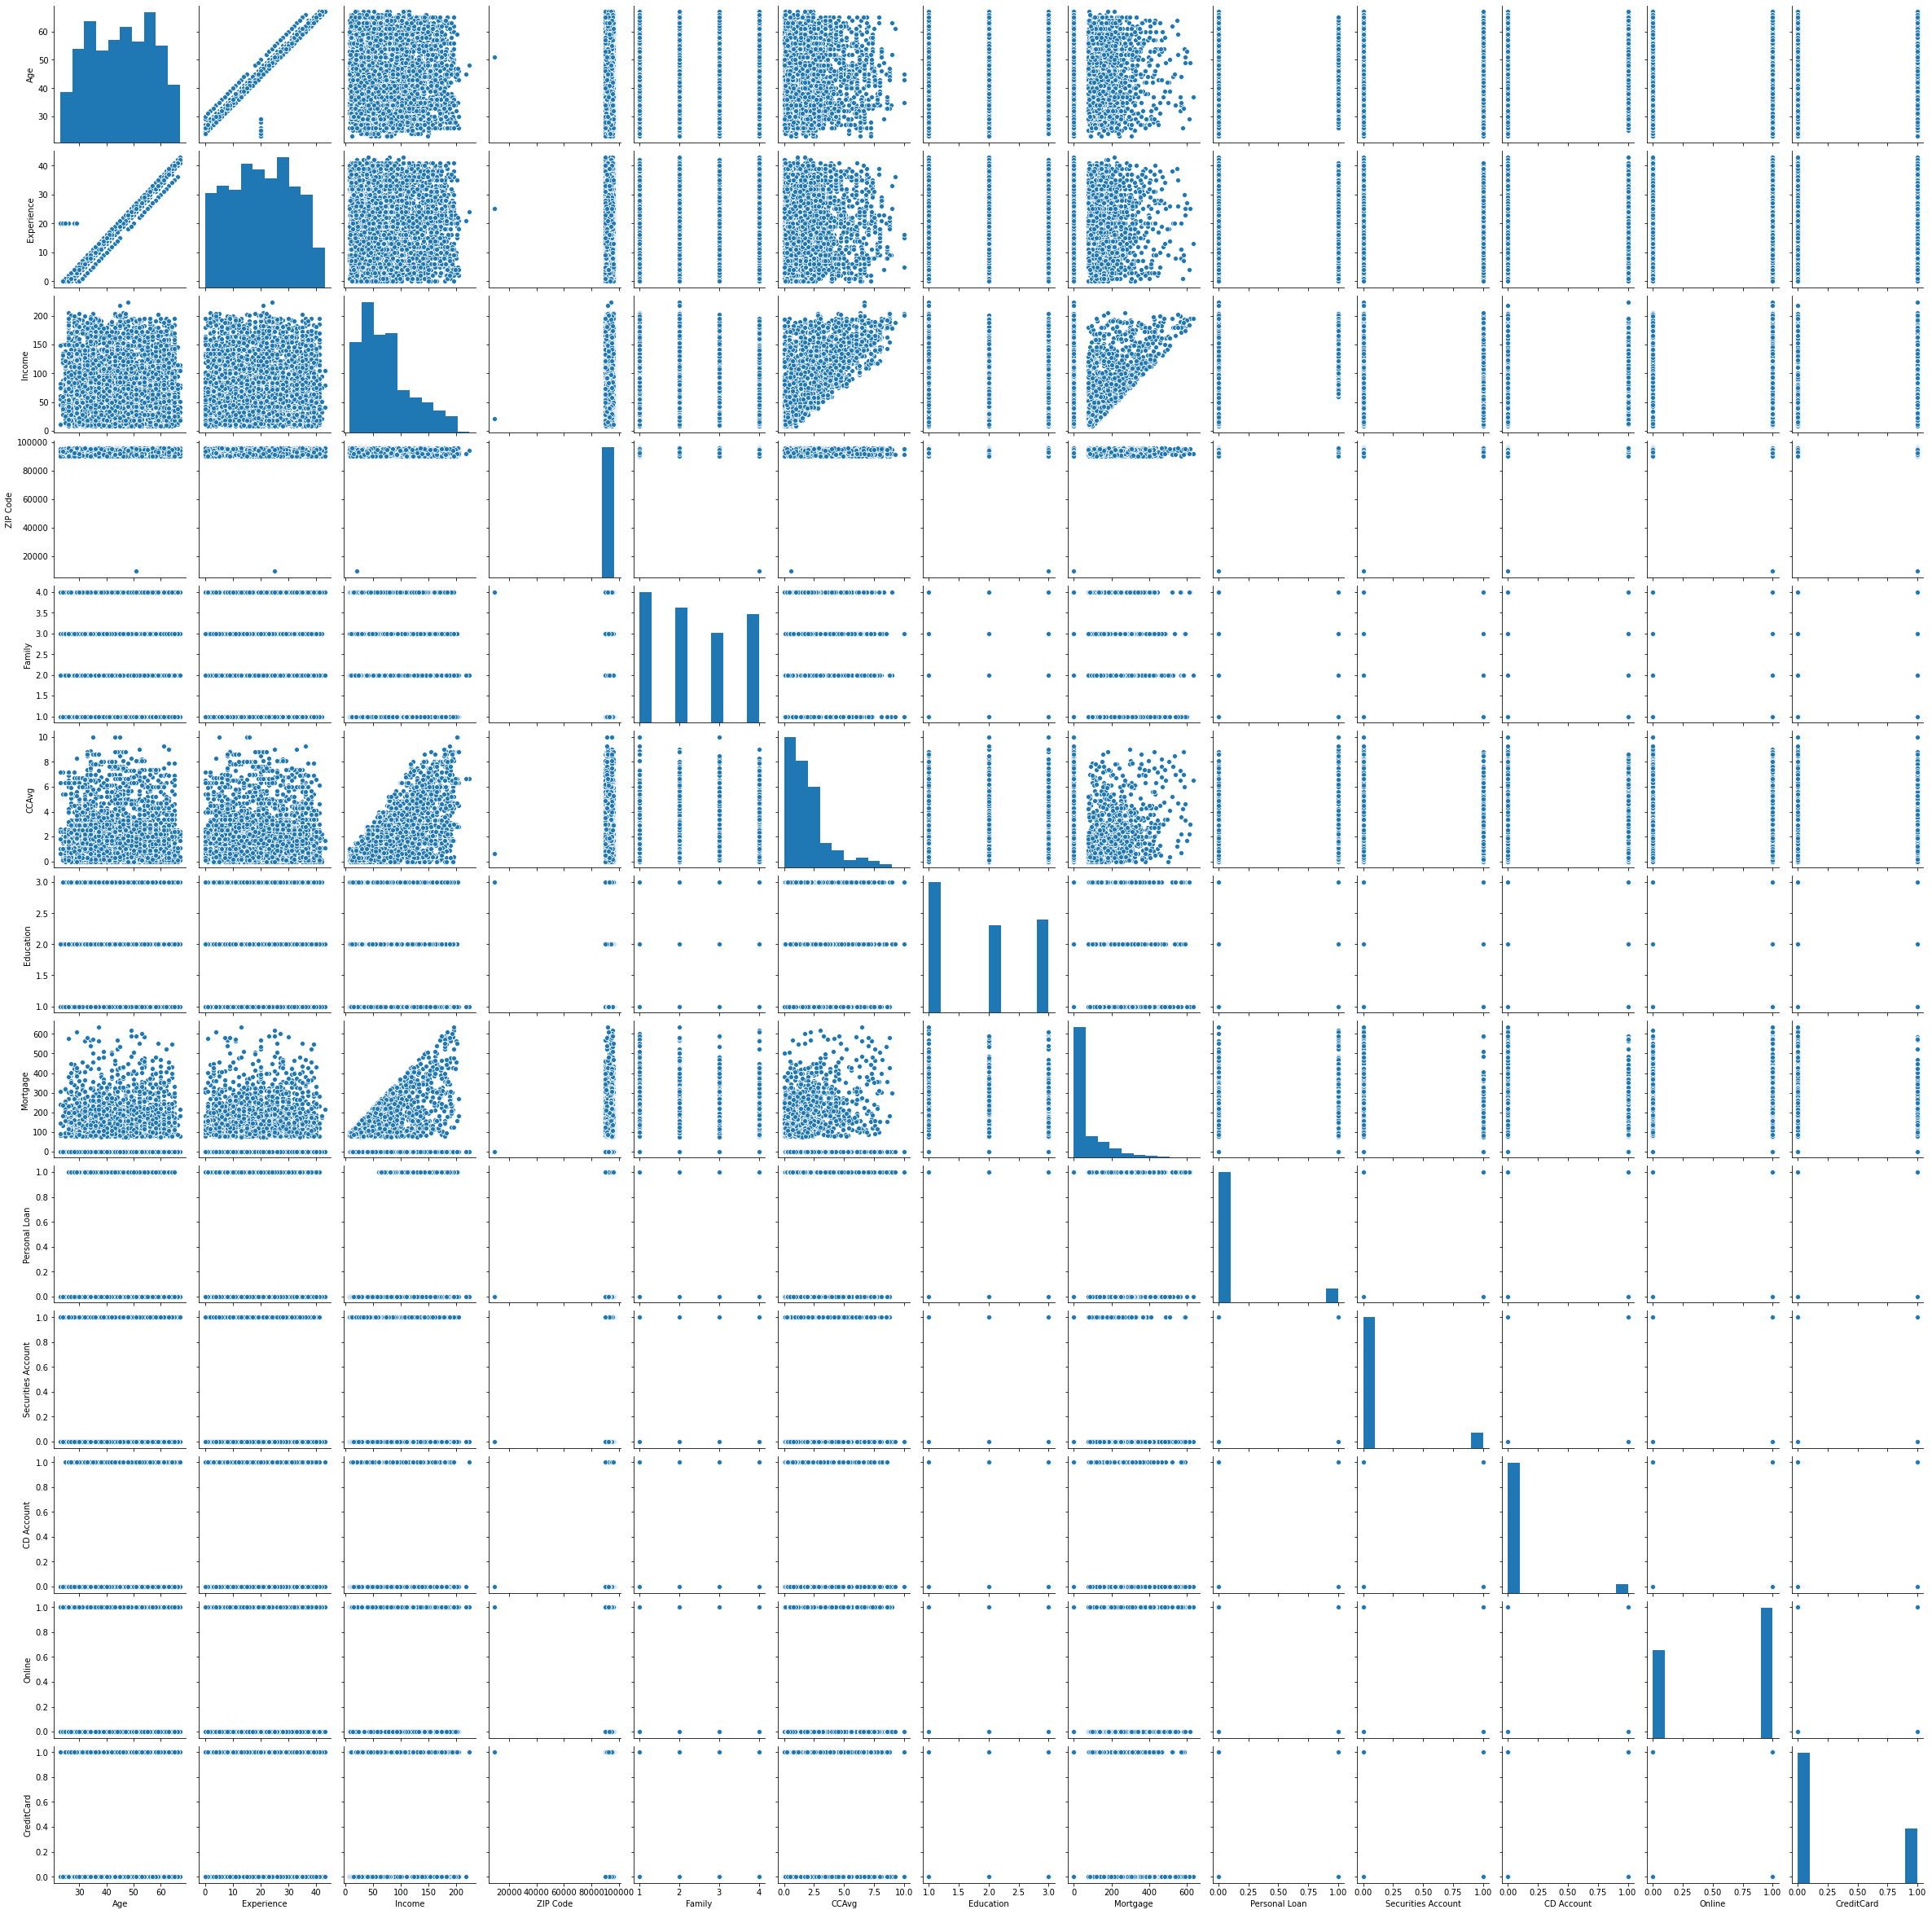

In [14]:
# Build a pairplot to show the pairwise relationship between all variables
# Drop ID column as it is not useful here
sns.pairplot(data.drop(columns=['ID']))

### Bivariate Analysis - Target Variable

In [15]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
# Target variable vs other columns aggregated
(
data
    .groupby('Personal Loan')
    .agg(
        {
            'Age': ['mean', 'median'],
            'Income': ['mean', 'median'],
            'Experience': ['mean', 'median'],
            'Family': ['mean', 'median'],
            'Education': ['mean', 'median'],
            'Mortgage': ['mean', 'median'],
            'CD Account': [lambda x: x.sum() / x.count()],
            'Online': [lambda x: x.sum() / x.count()],
            'CreditCard': [lambda x: x.sum() / x.count()],
            'Securities Account': [lambda x: x.sum() / x.count()]
        })
    .round(2)
)

Age         Income        Experience        Family         \
                mean median    mean median       mean median   mean median   
Personal Loan                                                                
0              45.37     45   66.24   59.0      20.38   20.0   2.37      2   
1              45.07     45  144.75  142.5      19.84   20.0   2.61      3   

              Education        Mortgage        CD Account   Online CreditCard  \
                   mean median     mean median   <lambda> <lambda>   <lambda>   
Personal Loan                                                                   
0                  1.84      2    51.79      0       0.04     0.60       0.29   
1                  2.23      2   100.85      0       0.29     0.61       0.30   

              Securities Account  
                        <lambda>  
Personal Loan                     
0                           0.10  
1                           0.12

**Insights**
1. Age appears to be similar, regardless of personal loan status
2. Income appears to be higher for households who accepted the personal loan
3. Experience appears to be similar, regardless of personal loan status
4. Family size and Education appears to be higher for households who accepted the personal loan
5. Mortgage value is higher for households who accepted the personal loan, although the median value is zero for both groups
6. A much greater share of households who accepted the personal loan have a CD account (29% vs 4%)
7. An equal share of households use online banking, regardless of personal loan status
8. An equal share of households use credit cards, regardless of personal loan status
9. A slightly higher share of households who accepted a personal loan use a securities account (12% vs 10%)

### Get the Data Model Ready

#### Create a Fresh Dataset and Drop 'ID' Column

In [17]:
# Create a copy of the data and drop the uneeded ID column
df = data.drop(columns=['ID']).copy('deep')

#### Handle ZIP Codes - There Are Too Many Unique Values

In [18]:
print(f"If we create dummy varibles for ZIP Code we will create an extra {df['ZIP Code'].nunique()} columns. This is too many.")
print(f"""The top 20 ZIP Codes account for {np.round(df['ZIP Code'].value_counts(normalize=True).head(20).sum(), 3) * 100}% of the data. I will only consider these and group remaining into 'Other'""")

If we create dummy varibles for ZIP Code we will create an extra 467 columns. This is too many.
The top 20 ZIP Codes account for 24.9% of the data. I will only consider these and group remaining into 'Other'


In [19]:
# Create list of top 20 most frequently occuring ZIP Codes
top_20_zip_codes = df['ZIP Code'].value_counts().head(20).index.to_list()
print(f"The top 20 ZIP Codes are {[z for z in top_20_zip_codes]}")

The top 20 ZIP Codes are [94720, 94305, 95616, 90095, 93106, 92037, 93943, 91320, 91711, 94025, 92093, 90245, 90024, 90089, 91330, 92121, 94304, 94143, 95051, 94608]


In [20]:
# Create 'Adjusted ZIP Code' column
df['Adj_ZIP_Code'] = np.where(df['ZIP Code'].isin(top_20_zip_codes), df['ZIP Code'], 'Other')
df['Adj_ZIP_Code'].value_counts()

Other    3757
94720     169
94305     127
95616     116
90095      71
93106      57
92037      54
93943      54
91320      53
94025      52
91711      52
92093      51
90245      50
90024      50
91330      46
90089      46
94304      45
92121      45
94143      37
94608      34
95051      34
Name: Adj_ZIP_Code, dtype: int64

In [21]:
# Drop old ZIP Code column
df.drop(columns=['ZIP Code'], inplace=True)

In [22]:
# Examine modified dataset
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Adj_ZIP_Code
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,Other
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,90089
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,94720
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,Other
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,91330


## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [23]:
# Split data into X & y
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [24]:
# Creating training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Training Set Preprocessing - Let's Prepare our Training Set for Modelling

#### Define Binary Columns - Training

In [25]:
# Define columns which just have two values: 0 or 1
binary_cols = ['Securities Account', 'CD Account', 'Online', 'CreditCard']
binary_train = X_train[binary_cols]

binary_train.head(3)

,Securities Account,CD Account,Online,CreditCard
1334,0,0,1,0
4768,0,0,1,0
65,0,0,1,1


#### Handle Categorical Columns (Dummy Variables) - Training

In [26]:
# Create dummy variables. Since 'Family' only has 4 unique values, we will treat it as a categorical column
dummy_cols = ['Family', 'Education', 'Adj_ZIP_Code']

dummies_train = pd.get_dummies(
    X_train[dummy_cols],
    columns=dummy_cols,
    drop_first=True
)

dummies_train.head(3)

,Family_2,Family_3,Family_4,Education_2,Education_3,Adj_ZIP_Code_90089,Adj_ZIP_Code_90095,Adj_ZIP_Code_90245,Adj_ZIP_Code_91320,Adj_ZIP_Code_91330,...,Adj_ZIP_Code_93943,Adj_ZIP_Code_94025,Adj_ZIP_Code_94143,Adj_ZIP_Code_94304,Adj_ZIP_Code_94305,Adj_ZIP_Code_94608,Adj_ZIP_Code_94720,Adj_ZIP_Code_95051,Adj_ZIP_Code_95616,Adj_ZIP_Code_Other
1334,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4768,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Handle Numerical Columns - Training

In [27]:
# Since we want to interpret the coefficients of the model, I will not implement Standardization/Scaling in this instance 
# This approach was recommended by Himanshu in the Mentored Support group
numerical_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
numerical_train = X_train[numerical_cols]

numerical_train.head(3)

,Age,Experience,Income,CCAvg,Mortgage
1334,47,22.0,35,1.3,0
4768,38,14.0,39,2.0,0
65,59,35.0,131,3.8,0


#### Combine Processed Training Sets

In [28]:
# Concatenate datasets into one
X_train_processed = pd.concat(
    [numerical_train, binary_train, dummies_train],
    axis=1
)

X_train_processed.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,...,Adj_ZIP_Code_93943,Adj_ZIP_Code_94025,Adj_ZIP_Code_94143,Adj_ZIP_Code_94304,Adj_ZIP_Code_94305,Adj_ZIP_Code_94608,Adj_ZIP_Code_94720,Adj_ZIP_Code_95051,Adj_ZIP_Code_95616,Adj_ZIP_Code_Other
1334,47,22.0,35,1.3,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4768,38,14.0,39,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
65,59,35.0,131,3.8,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
177,29,3.0,65,1.8,244,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4489,39,13.0,21,0.2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Test Set Preprocessing - Let's Carry out the Same Processes on our Test Set

#### Define Binary Columns - Test

In [29]:
binary_test = X_test[binary_cols]

#### Handle Categorical Columns (Dummy Variables) - Test

In [30]:
dummies_test = pd.get_dummies(
    X_test[dummy_cols],
    columns=dummy_cols,
    drop_first=True
)

#### Handle Numerical Columns - Test

In [31]:
# As explained above, we will not use feature scaling in this instance
numerical_test = X_test[numerical_cols]

#### Combine Processed Test Sets

In [32]:
# Concatenate datasets into one
X_test_processed = pd.concat(
    [numerical_test, binary_test, dummies_test],
    axis=1
)

X_test_processed.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,...,Adj_ZIP_Code_93943,Adj_ZIP_Code_94025,Adj_ZIP_Code_94143,Adj_ZIP_Code_94304,Adj_ZIP_Code_94305,Adj_ZIP_Code_94608,Adj_ZIP_Code_94720,Adj_ZIP_Code_95051,Adj_ZIP_Code_95616,Adj_ZIP_Code_Other
2764,31,5.0,84,2.9,105,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4767,35,9.0,45,0.9,101,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3814,34,9.0,35,1.3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3499,49,23.0,114,0.3,286,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2735,36,12.0,70,2.6,165,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

### Train Model

In [33]:
# Instantiate the Logistic Regression Model
logistic_regression = LogisticRegression(max_iter=10000)

# Fit the model to the training data
logistic_regression.fit(X_train_processed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Make Predictions

In [34]:
# Predict classes on the training and test set
y_preds_train = logistic_regression.predict(X_train_processed)
y_preds_test = logistic_regression.predict(X_test_processed)

# Predict probabilities on the training and test set
y_proba_train = logistic_regression.predict_proba(X_train_processed) 
y_proba_test = logistic_regression.predict_proba(X_test_processed)

### Evaluate Performance

In [35]:
def evaluate_performance(true, predicted_classes, predicted_proba):
    """
    Function to print various metrics relating to the performance of a model
    
    Args:        
        true: True labels
        predicted_classes: Predicted classes by the model
        predicted_proba: Predicted probabilities by the model
    """
    
    accuracy = accuracy_score(true, predicted_classes)
    log_loss_score = log_loss(true, predicted_proba)
    roc_auc = roc_auc_score(true, predicted_proba[:,1])
    f1 = f1_score(true, predicted_classes)
    precision = precision_score(true, predicted_classes)
    recall = recall_score(true, predicted_classes)    
    class_report = classification_report(true, predicted_classes)
    matrix = confusion_matrix(true, predicted_classes)    
    
    print(f'Accuracy:\t{np.round(accuracy, 3)}')
    print(f'Log-Loss:\t{np.round(log_loss_score, 3)}')
    print(f'ROC AUC Score:  {np.round(roc_auc, 3)}')
    print(f'F1-Score:\t{np.round(f1, 3)}')
    print(f'Precision\t{np.round(precision, 3)}')
    print(f'Recall\t\t{np.round(recall, 3)}\n')    
    print('Classification Report:')
    print(class_report, '\n')
    print('Confusion Matrix:')
    draw_cm(true, predicted_classes)
    
## function to get confusion matrix in a proper format
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    

NameError: name 'pd' is not defined

#### Training Performance

Training Set Performance:
Accuracy:	0.962
Log-Loss:	0.106
ROC AUC Score:  0.969
F1-Score:	0.773
Precision	0.89
Recall		0.683

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3169
           1       0.89      0.68      0.77       331

    accuracy                           0.96      3500
   macro avg       0.93      0.84      0.88      3500
weighted avg       0.96      0.96      0.96      3500
 

Confusion Matrix:


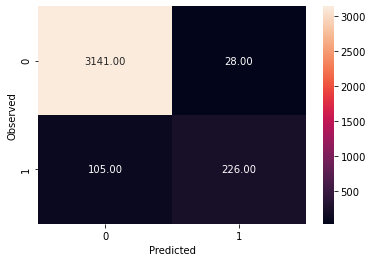

In [36]:
print('Training Set Performance:')
evaluate_performance(y_train, y_preds_train, y_proba_train)

#### Test Performance

Test Set Performance
Accuracy:	0.954
Log-Loss:	0.132
ROC AUC Score:  0.954
F1-Score:	0.723
Precision	0.9
Recall		0.604

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.90      0.60      0.72       149

    accuracy                           0.95      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500
 

Confusion Matrix:


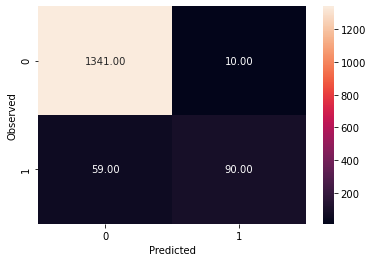

In [37]:
print('Test Set Performance')
evaluate_performance(y_test, y_preds_test, y_proba_test)

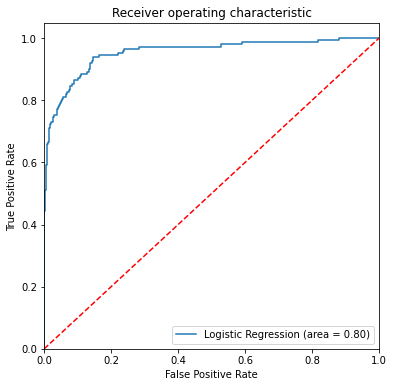

In [38]:
# Draw ROC Curve for test set performance
logit_roc_auc = roc_auc_score(y_test, y_preds_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Insights**
1. Our model performs well on both the training set and the test set. Therefore we can be confident it is not overfitting
2. Test Accuracy = 95% and Test ROC AUC Score = 0.95 which indicates very strong performance
3. Our Test recall is 60%. This means for every 10 households who actually accepted the personal loan, our model correctly identifies 6
4. Out Test precision is 90%. This means for every 10 households predicted to accept the loan by our model, 9 actually did accept the loan

## 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks) 

### Find out coefficients of all the attributes and show the output in a data frame with column names

In [39]:
# Create a DataFrame of coefficient labels and values
# Create an additional AbsoluteValue column to enable us to sort by coefficient magnitude, and sort descending
# Transposed for easier readibility
coeffs = (
pd
    .DataFrame(
        data=logistic_regression.coef_,
        columns=X_train_processed.columns,
        index=['Coefficients'])
    .round(2)
    .T
    .assign(AbsoluteValue=lambda x: abs(x.Coefficients)) # Create AbsoluteValue column for magnitude
    .sort_values('AbsoluteValue', ascending=False)    
)
coeffs

,Coefficients,AbsoluteValue
Education_3,3.55,3.55
Education_2,3.34,3.34
CD Account,2.98,2.98
Family_3,2.17,2.17
Family_4,1.46,1.46
CreditCard,-0.76,0.76
Securities Account,-0.74,0.74
Adj_ZIP_Code_90095,-0.68,0.68
Adj_ZIP_Code_93106,0.56,0.56
Adj_ZIP_Code_94304,0.55,0.55


### For test data show all the rows where the predicted class is not equal to the observed class

In [40]:
# Append true and predicted values to our Test set and inspect
X_test_processed['y_true'] = y_test
X_test_processed['y_pred'] = y_preds_test

X_test_processed.head(3)

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,...,Adj_ZIP_Code_94143,Adj_ZIP_Code_94304,Adj_ZIP_Code_94305,Adj_ZIP_Code_94608,Adj_ZIP_Code_94720,Adj_ZIP_Code_95051,Adj_ZIP_Code_95616,Adj_ZIP_Code_Other,y_true,y_pred
2764,31,5.0,84,2.9,105,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4767,35,9.0,45,0.9,101,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3814,34,9.0,35,1.3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
# Return rows where prediction was incorrect - i.e. y_pred does not equal y_true
X_test_processed[X_test_processed.y_pred != X_test_processed.y_true].head(10)

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,...,Adj_ZIP_Code_94143,Adj_ZIP_Code_94304,Adj_ZIP_Code_94305,Adj_ZIP_Code_94608,Adj_ZIP_Code_94720,Adj_ZIP_Code_95051,Adj_ZIP_Code_95616,Adj_ZIP_Code_Other,y_true,y_pred
932,51,27.0,112,1.8,0,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3347,65,41.0,78,2.0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
4377,33,8.0,145,2.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3988,59,35.0,85,3.4,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3271,52,27.0,93,4.1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
349,26,2.0,60,3.0,132,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
927,65,40.0,95,3.7,138,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2968,44,18.0,162,1.3,301,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1518,43,17.0,64,3.0,221,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1552,29,5.0,195,4.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [42]:
# Count rows where prediction was incorrect - i.e. y_pred does not equal y_true
incorrect_preds = len(X_test_processed[X_test_processed.y_pred != X_test_processed.y_true])
false_positives = len(X_test_processed[(X_test_processed.y_pred == 1) & (X_test_processed.y_true == 0)])
false_negatives = len(X_test_processed[(X_test_processed.y_pred == 0) & (X_test_processed.y_true == 1)])

print(f"Number of incorrect predictions on test set: {incorrect_preds}")
print(f"Number of instances where model predicted 1 but true value was 0 (false positives): {false_positives}")
print(f"Number of instances where model predicted 0 but true value was 1 (false negatives): {false_negatives}")

Number of incorrect predictions on test set: 69
Number of instances where model predicted 1 but true value was 0 (false positives): 10
Number of instances where model predicted 0 but true value was 1 (false negatives): 59


## 6. Give conclusion related to the Business understanding of your model? (5 marks) 

**Insights**
* Purpose of model is to predict the likelihood of a liability customer buying personal loans, and it does this very well, illustrated by the strong performance metrics on the test set
* Interpreting False Positives and False Negatives:
    * False Positive is where the model predicts that a customer will accept the loan offer, but they actually won't
    * False Negative is where the model predicts that a customer won't accept the loan offer, but they actuall will
    * In this context, I would suggest a False Negative is more costly to the busines, because it represents the lost revenue from customers who were not offered a loan, *but would have actually accepted one* if offered. Therefore False Negatives represent lost opportunity to the business in interest revenue
    * A False Positive is not so costly, because the customer will simply reject the loan when offered, at no cost to the business (apart from mailing costs perhaps)
* Interpreting Coefficients
    * Advanced/Professional Education, Graduate Education and the presence of a CD account appear carry weight in the model and are positively correlated with the target variable
* Further Work:
    * Given that recall is only 60%, there is a significant portion of customers who *would* have accepted the loan, but were predicted not to, representing lost revenue to the business
    * To improve performance, I would suggest:
        * Tweaking the threshold. A lower threshold (<0.5) would increase recall, but sacrifice precision. However, this could be viewed as an acceptable trade-off if recall is considered to be a more important metric
        * Experiment with class balancing (upsampling/downsampling)
        * Generating new features (interactions/log transformations/polynomial features etc.)
        * Trying different solvers ('newton-cg','lbfgs','liblinear','sag','saga')
        * Trying different model parameters (l1 vs l2 regularization)
        * Gathering more data if possible (from other marketing campaigns perhaps?)
        * Experimenting with more complex models (e.g. Random Forrest)